<a href="https://colab.research.google.com/github/ertgrulyksk/forecasting-house-prices/blob/main/forecasting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [96]:
ev=pd.read_csv("ev.csv")

In [97]:
ev.head(3)

,Unnamed: 0,title,area,numberOfRooms,price,town,district
0,0,BURGAZADA`DA SATILIK DAİRE,100.0,2+1,6.350.000,Burgazada,Burgazada Mh.
1,1,BÜYÜKADA SAHİLDE SATILIK DUBLEKS DAİRE HAVUZLU...,130.0,3+2,4.450.000,Büyükada,Maden Mh.
2,2,Planet'ten İskeleye Yakın Geniş 2+1 Bahçe Katı...,110.0,2+1,2.500.000,Büyükada,Nizam Mh.


In [98]:
ev=ev.drop("Unnamed: 0",axis=1)

In [99]:
ev.head(3)

,title,area,numberOfRooms,price,town,district
0,BURGAZADA`DA SATILIK DAİRE,100.0,2+1,6.350.000,Burgazada,Burgazada Mh.
1,BÜYÜKADA SAHİLDE SATILIK DUBLEKS DAİRE HAVUZLU...,130.0,3+2,4.450.000,Büyükada,Maden Mh.
2,Planet'ten İskeleye Yakın Geniş 2+1 Bahçe Katı...,110.0,2+1,2.500.000,Büyükada,Nizam Mh.


In [100]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14651 entries, 0 to 14650
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          14651 non-null  object 
 1   area           14651 non-null  float64
 2   numberOfRooms  14651 non-null  object 
 3   price          14651 non-null  object 
 4   town           14651 non-null  object 
 5   district       13247 non-null  object 
dtypes: float64(1), object(5)
memory usage: 686.9+ KB


In [101]:
ev['title']=ev['title'].str.lower()

In [102]:
ev[ev['title'].str.contains("sifir")].head(3)

,title,area,numberOfRooms,price,town,district
49,kinaliada alsancak caddesi̇'nde deni̇ze sifir ...,120.0,3+1,9.000.000,Kınalıada,Kınalıada Mh.
141,has evi̇m yapidan satilik 3+1 sifir ters duble...,120.0,3+1,870.000,Arnavutköy,Anadolu Mah.
169,arnavutköy bolluca mavi̇göl'de satilik sifir d...,95.0,2+1,1.250.000,Bolluca,Mavigöl Mh.


In [103]:
ev['title']=ev['title'].replace("sifir","sıfır")

In [104]:
ev[ev['title'].str.contains("denize sıfır")]

,title,area,numberOfRooms,price,town,district
99,planet'ten muhteşem denize sıfır manzaralı hav...,155.0,3+1,6.000.000,Büyükada,Maden Mh.
14179,denize sıfır e-5'e sıfır tadilatlı full eşyalı...,45.0,1+0,900.000,Büyükçekmece,Yenimahalle Mah.


In [105]:
ev['yeni']=ev['title'].str.contains("sıfır")

In [106]:
ev.head(3)

,title,area,numberOfRooms,price,town,district,yeni
0,burgazada`da satilik dai̇re,100.0,2+1,6.350.000,Burgazada,Burgazada Mh.,False
1,büyükada sahi̇lde satilik dubleks dai̇re havuz...,130.0,3+2,4.450.000,Büyükada,Maden Mh.,False
2,planet'ten i̇skeleye yakın geniş 2+1 bahçe kat...,110.0,2+1,2.500.000,Büyükada,Nizam Mh.,False


In [107]:
ev['numberOfRooms'].str.split("+",expand=True).head(3)

,0,1
0,2,1
1,3,2
2,2,1


In [108]:
ev['oda']=ev['numberOfRooms'].str.split("+",expand=True)[0]

In [109]:
ev['salon']=ev['numberOfRooms'].str.split("+",expand=True)[1]

In [110]:
ev.head(3)

,title,area,numberOfRooms,price,town,district,yeni,oda,salon
0,burgazada`da satilik dai̇re,100.0,2+1,6.350.000,Burgazada,Burgazada Mh.,False,2,1
1,büyükada sahi̇lde satilik dubleks dai̇re havuz...,130.0,3+2,4.450.000,Büyükada,Maden Mh.,False,3,2
2,planet'ten i̇skeleye yakın geniş 2+1 bahçe kat...,110.0,2+1,2.500.000,Büyükada,Nizam Mh.,False,2,1


In [111]:
ev=ev.drop(columns=["title","numberOfRooms"])

In [112]:
ev.head(3)

,area,price,town,district,yeni,oda,salon
0,100.0,6.350.000,Burgazada,Burgazada Mh.,False,2,1
1,130.0,4.450.000,Büyükada,Maden Mh.,False,3,2
2,110.0,2.500.000,Büyükada,Nizam Mh.,False,2,1


In [113]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14651 entries, 0 to 14650
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      14651 non-null  float64
 1   price     14651 non-null  object 
 2   town      14651 non-null  object 
 3   district  13247 non-null  object 
 4   yeni      14651 non-null  bool   
 5   oda       14651 non-null  object 
 6   salon     14648 non-null  object 
dtypes: bool(1), float64(1), object(5)
memory usage: 701.2+ KB


In [114]:
ev['price']=ev['price'].str.replace(".","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [115]:
ev=ev[ev['price']!="Üzeri"]

In [116]:
ev['price']=pd.to_numeric(ev['price'])

In [117]:
ev.head(3)

,area,price,town,district,yeni,oda,salon
0,100.0,6350000,Burgazada,Burgazada Mh.,False,2,1
1,130.0,4450000,Büyükada,Maden Mh.,False,3,2
2,110.0,2500000,Büyükada,Nizam Mh.,False,2,1


In [118]:
ev['oda']=pd.to_numeric(ev['oda'])
ev['salon']=pd.to_numeric(ev['salon'])

In [119]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14648 entries, 0 to 14650
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      14648 non-null  float64
 1   price     14648 non-null  int64  
 2   town      14648 non-null  object 
 3   district  13244 non-null  object 
 4   yeni      14648 non-null  bool   
 5   oda       14648 non-null  float64
 6   salon     14648 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 815.4+ KB


In [120]:
ev['yeni']=np.where(ev['yeni'],1,0)

In [121]:
ev.head(3)

,area,price,town,district,yeni,oda,salon
0,100.0,6350000,Burgazada,Burgazada Mh.,0,2.0,1
1,130.0,4450000,Büyükada,Maden Mh.,0,3.0,2
2,110.0,2500000,Büyükada,Nizam Mh.,0,2.0,1


In [122]:
min=ev['price']>100_001
max=ev['price']<30_000_000

In [123]:
ev=ev[min & max]

In [124]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14485 entries, 0 to 14650
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      14485 non-null  float64
 1   price     14485 non-null  int64  
 2   town      14485 non-null  object 
 3   district  13138 non-null  object 
 4   yeni      14485 non-null  int64  
 5   oda       14485 non-null  float64
 6   salon     14485 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 905.3+ KB


In [125]:
ucbir=ev[(ev['oda']==3) & (ev['salon']==1)]

In [126]:
ilce=ucbir.groupby(by="town").mean()

In [127]:
ilceler=["Adalar", "Bağcılar", "Bahçelievler", "Bakırköy", "Beşiktaş", "Beykoz", "Beyoğlu", "Büyükçekmece", "Çatalca", "Eminönü", "Esenler", "Eyüp", "Fatih", "Gaziosmanpaşa", "Güngören", "Kadıköy", "Kağıthane", "Kartal", "Küçükçekmece", "Maltepe", "Pendik", "Sarıyer", "Silivri", "Şile", "Şişli", "Sultanbeyli", "Tuzla", "Ümraniye", "Üsküdar", "Zeytinburnu"]

In [128]:
tanimli=ilce.index

In [129]:
i=[]
for a in tanimli:
    if a in ilceler:
        i.append(a)

In [130]:
ilce.loc[i]

,area,price,yeni,oda,salon
town,,,,,
Bağcılar,145.500000,3.564583e+06,0.000000,3.0,1.0
Beykoz,143.111111,3.250000e+06,0.111111,3.0,1.0
Fatih,139.136364,3.087955e+06,0.045455,3.0,1.0
Gaziosmanpaşa,119.000000,2.316667e+06,0.000000,3.0,1.0
Maltepe,157.730769,8.124231e+06,0.000000,3.0,1.0
Şişli,138.815789,4.498553e+06,0.026316,3.0,1.0


In [131]:
i

['Bağcılar', 'Beykoz', 'Fatih', 'Gaziosmanpaşa', 'Maltepe', 'Şişli']

In [132]:
x=ilce.loc[i]

In [133]:
x.head(3)

,area,price,yeni,oda,salon
town,,,,,
Bağcılar,145.500000,3.564583e+06,0.000000,3.0,1.0
Beykoz,143.111111,3.250000e+06,0.111111,3.0,1.0
Fatih,139.136364,3.087955e+06,0.045455,3.0,1.0


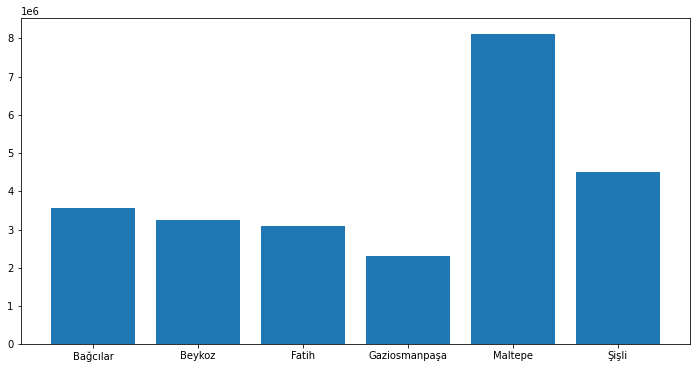

In [134]:
plt.figure(figsize=(12,6))
plt.bar(x.index,x['price'])
plt.show()

In [135]:
ev.head(3)

,area,price,town,district,yeni,oda,salon
0,100.0,6350000,Burgazada,Burgazada Mh.,0,2.0,1
1,130.0,4450000,Büyükada,Maden Mh.,0,3.0,2
2,110.0,2500000,Büyükada,Nizam Mh.,0,2.0,1


In [136]:
ev=pd.get_dummies(ev,columns=["town","district"],drop_first=True)

In [137]:
y=ev[['price']]
x=ev.drop("price",axis=1)

In [138]:
reg=LinearRegression()
model=reg.fit(x,y)
model.score(x,y)

0.711918477234383

In [139]:
reg=Ridge()
model=reg.fit(x,y)
model.score(x,y)

0.706749052920882

In [140]:
reg=Lasso(alpha=0)
model=reg.fit(x,y)
model.score(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.771e+16, tolerance: 1.923e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

0.711769173996804

In [141]:
reg=ElasticNet()
model=reg.fit(x,y)
model.score(x,y)

0.32300895370471094

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=20)

In [143]:
# Since the expected result is very bad, I try other situations

reg=LinearRegression()
model=reg.fit(x_train,y_train)
model.score(x_test,y_test)

-35415108216738.15

In [144]:
reg=Ridge()
model=reg.fit(x_train,y_train)
model.score(x_test,y_test)

0.6683192780379588

In [145]:
reg=Lasso()
model=reg.fit(x_train,y_train)
model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.399e+16, tolerance: 1.715e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.6639019190313029